In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('/content/penguins_lter.csv')

# Clean the dataset (dropping rows with missing values)
cleaned_data = data.dropna(subset=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'])

# Select features for clustering
features = cleaned_data[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming there are 3 species
cleaned_data['Cluster'] = kmeans.fit_predict(features_scaled)

# Mapping clusters to original species for evaluation
species_to_cluster = {}
for cluster in range(3):
    # Get the species for the current cluster
    most_common_species = cleaned_data[cleaned_data['Cluster'] == cluster]['Species'].mode()[0]
    species_to_cluster[cluster] = most_common_species

# Create labels for evaluation
cleaned_data['Predicted Species'] = cleaned_data['Cluster'].map(species_to_cluster)

# Prepare data for evaluation
y_true = cleaned_data['Species'].values
y_pred = cleaned_data['Predicted Species'].values

# Evaluate the clustering
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Display results
print(f"Accuracy of the clustering: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy of the clustering: 0.92

Confusion Matrix:
[[127  24   0]
 [  5  63   0]
 [  0   0 123]]

Classification Report:
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.96      0.84      0.90       151
Chinstrap penguin (Pygoscelis antarctica)       0.72      0.93      0.81        68
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00       123

                                 accuracy                           0.92       342
                                macro avg       0.90      0.92      0.90       342
                             weighted avg       0.93      0.92      0.92       342



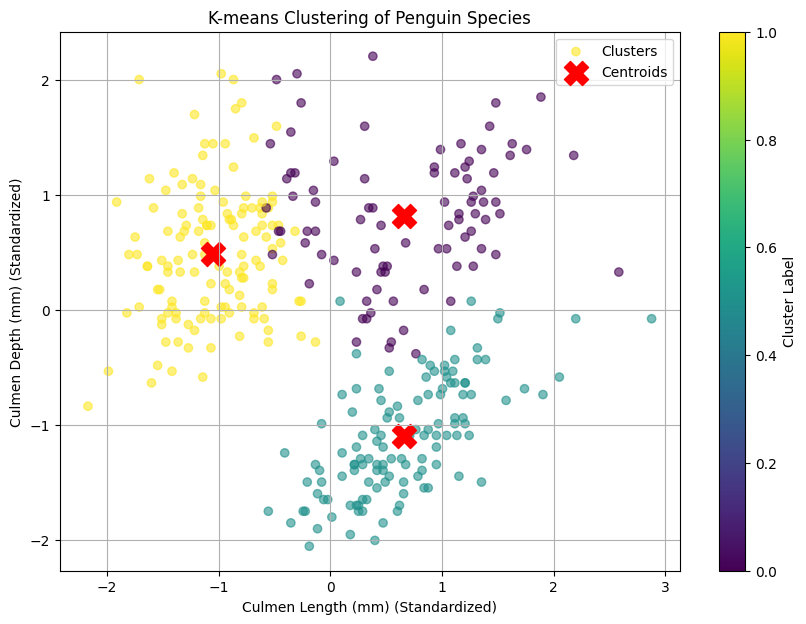

In [2]:
# Visualization of the clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=cleaned_data['Cluster'], cmap='viridis', label='Clusters', alpha=0.6)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')  # Mark centroids
plt.title('K-means Clustering of Penguin Species')
plt.xlabel('Culmen Length (mm) (Standardized)')
plt.ylabel('Culmen Depth (mm) (Standardized)')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.grid()
plt.show()

In [3]:
# Function to predict new data points
def predict_new_data(new_data):
    # Create a DataFrame with the same columns as the training data
    new_data_df = pd.DataFrame(new_data, columns=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'])

    # Standardize the new data
    new_data_scaled = scaler.transform(new_data_df)

    # Predict the cluster
    predicted_clusters = kmeans.predict(new_data_scaled)

    # Map these predicted clusters to the species
    predicted_species = [species_to_cluster[cluster] for cluster in predicted_clusters]

    return predicted_species

# Example new data point (adjust this with your actual new data)
new_data_example = np.array([[39.1, 18.7, 196.0, 3450]])  # Example data point

# Predicting the species for the new data point
predicted_species = predict_new_data(new_data_example)
print(f"Predicted species for the new data point: {predicted_species}")


Predicted species for the new data point: ['Adelie Penguin (Pygoscelis adeliae)']
